# 层次聚类-聚合聚类

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(precision=4, suppress=True, threshold=16)

In [2]:
data = np.loadtxt('testSet2.txt')
data

array([[ 3.2752,  2.9576],
       [-3.3445,  2.6035],
       [ 0.3551, -3.3766],
       ...,
       [ 2.9608,  3.0796],
       [-3.2755,  1.5771],
       [ 0.6393, -3.4128]])

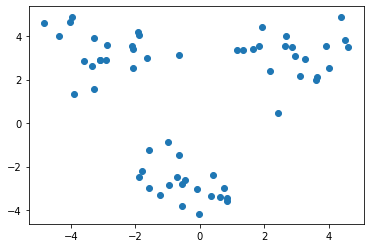

In [3]:
plt.scatter(data[:, 0], data[:, 1])

In [11]:
a = np.arange(10).reshape(10, 1).tolist()
a

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]

In [100]:
from itertools import combinations

class AgglomerativeCluster:
    def __init__(self, n_clusters=3, linkage_type='average'):
        self.n_clusters = n_clusters
        self.linkage_type = linkage_type
    
    def get_linkage(self, cluster_1, cluster_2):
        if self.linkage_type == 'single':  # 最短
            linkage = np.inf
            for sample_1 in cluster_1:
                for sample_2 in cluster_2:
                    distance = self.distances[sample_1, sample_2]
                    if distance < linkage:
                        linkage = distance
        elif self.linkage_type == 'complete':  # 最长
            linkage = 0
            for sample_1 in cluster_1:
                for sample_2 in cluster_2:
                    distance = self.distances[sample_1, sample_2]
                    if distance > linkage:
                        linkage = distance
        elif self.linkage_type == 'average':  # 平均距离
            distances = []
            for sample_1 in cluster_1:
                for sample_2 in cluster_2:
                    distance = self.distances[sample_1, sample_2]
                    distances.append(distance)
            linkage = np.mean(distances)
        else:  # 方差最小化
            pass
        return linkage
    
    
    def clustering(self, clusters):
        while True:
            combins = [c for c in combinations(range(len(clusters)), 2)]
            linkages = [self.get_linkage(clusters[c[0]], clusters[c[1]]) for c in combins]
            # 类间距最小的2个类
            min_arg = combins[np.argmin(linkages)]
            # 合并距离最短的2个簇
            clusters.append(clusters[min_arg[0]] + clusters[min_arg[1]])
            
            # 注意list pop的顺序 先后再前
            clusters.pop(max(min_arg))
            clusters.pop(min(min_arg))
            if len(clusters) == self.n_clusters:
                break
        return clusters
    
    def fit(self, X):
        n_samples, n_features = X.shape
        # 相同簇的样本放在同一个子list中
        clusters = np.arange(n_samples).reshape(n_samples, 1).tolist()
        self.labels_ = np.zeros(n_samples, dtype=int)
        
        # d_{ij} 样本X_i 与 X_j 间距
        self.distances = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            self.distances[i, :] = np.sqrt(np.sum(np.square(X[i] - X[:]), axis=1))
        # 聚合聚类   
        self.clusters = self.clustering(clusters)
        
        # 聚类结果转成labels的形式
        for c in range(len(self.clusters)):
            for i in clusters[c]:
                self.labels_[i] = c
    
    def predict(self, X):
        pass

In [105]:
clf = AgglomerativeCluster(3, linkage_type='average')
clf.fit(data)

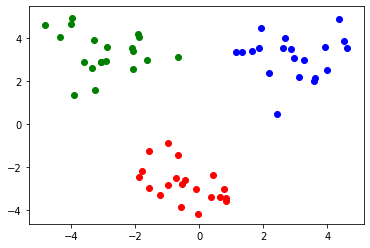

In [106]:
colors = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(data[clf.labels_==i, 0], data[clf.labels_==i, 1], color=colors[i])

## AgglomerativeClustering

In [108]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering

In [109]:
iris = load_iris()
X = iris.data
X_std = scale(X)

In [110]:
clf = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=3)
clf.fit(X_std)

d:\python3.7\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

需要注意的参数:
- affinity: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. default: “euclidean”
- linkage: Which linkage criterion to use. [{“ward”, “complete”, “average”, “single”}, optional (default=”ward”)]

In [112]:
clf.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)